## Machine learning updated

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
df = pd.read_csv('precos.csv')
df.head()

,milhas_por_ano,ano_do_modelo,preco,vendido
0,21801,2000,30941.02,1
1,7843,1998,40557.96,1
2,7109,2006,89627.50,0
3,26823,2015,95276.14,0
4,7935,2014,117384.68,1


In [4]:
df["km_por_ano"] = df["milhas_por_ano"] * 1.60934
df['idade'] = datetime.today().year - df['ano_do_modelo']
df.drop(['ano_do_modelo', 'milhas_por_ano'], axis=1, inplace=True)
df = df[['km_por_ano', 'idade', 'preco', 'vendido']]
df.head()

,km_por_ano,idade,preco,vendido
0,35085.22134,24,30941.02,1
1,12622.05362,26,40557.96,1
2,11440.79806,18,89627.50,0
3,43167.32682,9,95276.14,0
4,12770.11290,10,117384.68,1


In [5]:
x = df[['km_por_ano', 'idade', 'preco']]
y = df['vendido']

In [6]:
SEED = 20
np.random.seed(SEED)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, stratify=y)
scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)
model = SVC(gamma="auto")
model.fit(train_x, train_y)
predictions = model.predict(test_x)
accuracy = accuracy_score(test_y, predictions)
print(f'accuracy: {accuracy * 100:.2f}%')

accuracy: 75.92%


In [7]:
# dummy classifier usa raw_data, não dados normalizados
# baseline é classificar segundo a classe mais frequente
baseline = DummyClassifier()
baseline.fit(raw_train_x, train_y)
pred = baseline.predict(raw_test_x)
accuracy = accuracy_score(test_y, pred) * 100
print(f'{accuracy:.2f}%')
# agora baseline é estratificado -> proporcional às frequências
baseline = DummyClassifier(strategy='stratified')
baseline.fit(raw_train_x, train_y)
pred = baseline.predict(raw_test_x)
accuracy = accuracy_score(test_y, pred) * 100
print(f'{accuracy:.2f}%')

58.00%
52.20%


In [8]:
SEED = 20
np.random.seed(SEED)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, stratify=y)
scaler = StandardScaler()
scaler.fit(raw_train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)
model = DecisionTreeClassifier(max_depth=3) # limitar tamanho da árvore
model.fit(train_x, train_y)
predictions = model.predict(test_x)
accuracy = accuracy_score(test_y, predictions)
print(f'accuracy: {accuracy * 100:.2f}%')

accuracy: 78.40%


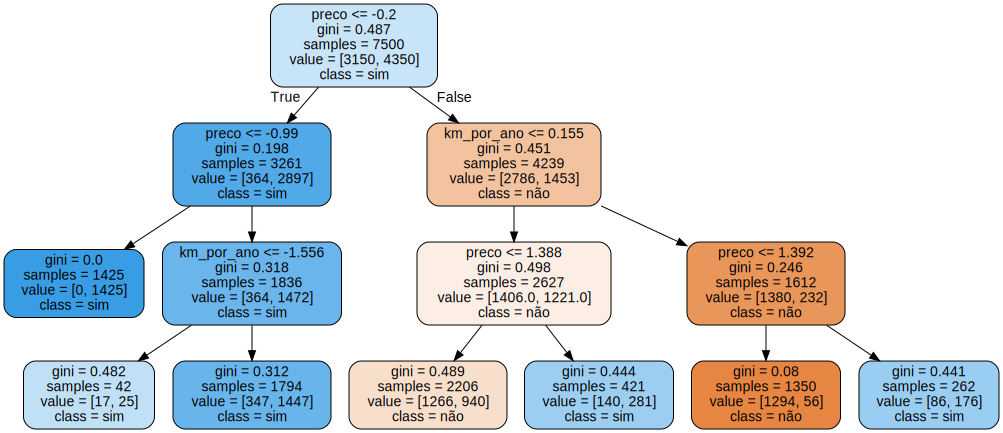

In [9]:
from sklearn.tree import export_graphviz
import graphviz

structure = export_graphviz(model, filled=True, rounded=True,
                            feature_names=x.columns,
                            class_names=["não", "sim"])
graph = graphviz.Source(structure)
graph
# dados negativos porque foram normalizados

accuracy: 78.40%


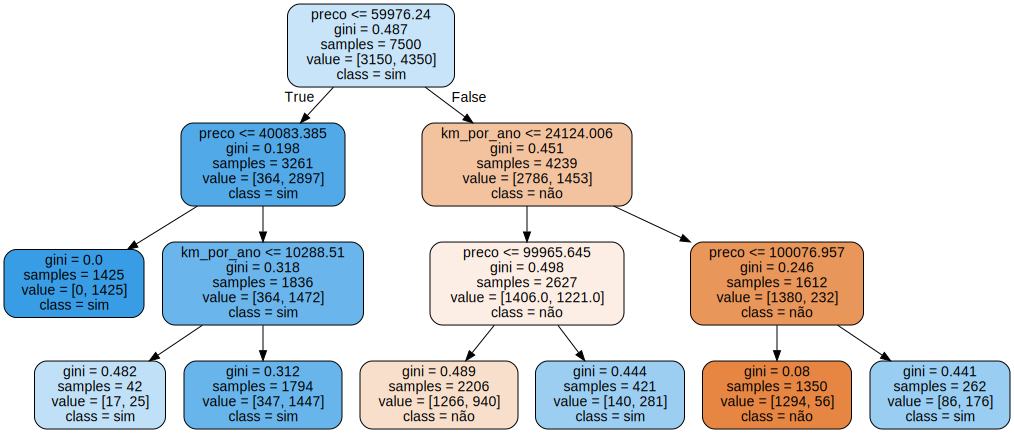

In [10]:
SEED = 20
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, stratify=y)
model = DecisionTreeClassifier(max_depth=3) # limitar tamanho da árvore
model.fit(train_x, train_y)
predictions = model.predict(test_x)
accuracy = accuracy_score(test_y, predictions)
print(f'accuracy: {accuracy * 100:.2f}%')
structure = export_graphviz(model, filled=True, rounded=True,
                            feature_names=x.columns,
                            class_names=["não", "sim"])
graph = graphviz.Source(structure)
graph
# utilizar valores não normalizados não afetou o algoritmo de decision tree